In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.formula.api import ols
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math



In [2]:
# Loading CSV
original_df = pd.read_csv('newyork_housing.csv')



C:\Users\anara\AppData\Local\Temp\ipykernel_63704\3639813484.py:2: DtypeWarning: Columns (2,5,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289

In [159]:
df = original_df

In [160]:
df.columns

Index(['address/city', 'address/community', 'address/neighborhood',
       'address/state', 'address/streetAddress', 'address/subdivision',
       'address/zipcode', 'bathrooms', 'bedrooms', 'currency',
       ...
       'schools/2/link', 'schools/2/name', 'schools/2/rating',
       'schools/2/size', 'schools/2/studentsPerTeacher',
       'schools/2/totalCount', 'schools/2/type', 'url', 'yearBuilt', 'zpid'],
      dtype='object', length=1507)

In [161]:
# EDA/Cleaning
df['address/city'] = df['address/city'].replace('Jamaica', 'Queens')
df['address/city'] = df['address/city'].replace('Flushing', 'Queens')
df = df[(df['address/city'] =='Bronx') | (df['address/city']=='Brooklyn') | (df['address/city'] =='Staten Island') | 
             (df['address/city']=='Queens') | (df['address/city']=='Manhattan')]

# Data cleaning, replacing city names to borough

In [162]:
# Features to test 

df = df[['price', 'address/zipcode', 'bedrooms', 'bathrooms', 'address/city', 'yearBuilt', 'livingArea', 'resoFactsStats/hasHeating', 'schools/0/rating']]

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59344 entries, 1 to 75629
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      59316 non-null  float64
 1   address/zipcode            59333 non-null  float64
 2   bedrooms                   44387 non-null  float64
 3   bathrooms                  44481 non-null  float64
 4   address/city               59344 non-null  object 
 5   yearBuilt                  56433 non-null  float64
 6   livingArea                 54693 non-null  float64
 7   resoFactsStats/hasHeating  58633 non-null  object 
 8   schools/0/rating           58551 non-null  float64
dtypes: float64(7), object(2)
memory usage: 4.5+ MB


In [164]:
df = df[df.isnull().sum(axis=1) < 1]
df = df[df['bedrooms'].isnull() == False]
df = df[df['address/zipcode'].isnull() == False]
df = df[df['bedrooms'] < 5]
df = df[df['bathrooms'].isnull() == False]
df = df[df['bathrooms'] < 5]
df = df[df['price'].isnull() == False]
df = df[df['price'] > 500000]
df = df[df['price'] < 5000000]

# null observations and outliers 
df.shape 

(18573, 9)

In [165]:
features = ['address/zipcode', 'bedrooms', 'bathrooms', 'address/city', 'livingArea', 'yearBuilt', 'resoFactsStats/hasHeating', 'schools/0/rating']

df.head()

,price,address/zipcode,bedrooms,bathrooms,address/city,yearBuilt,livingArea,resoFactsStats/hasHeating,schools/0/rating
2,1495000.0,10463.0,4.0,3.0,Bronx,1920.0,4233.0,False,10.0
6,1275000.0,10471.0,3.0,3.0,Bronx,1930.0,1864.0,True,7.0
8,2895000.0,10471.0,4.0,4.0,Bronx,1901.0,3500.0,True,7.0
13,1250000.0,10463.0,4.0,4.0,Bronx,1988.0,2300.0,True,10.0
16,2400000.0,10471.0,4.0,4.0,Bronx,1952.0,3520.0,True,7.0


In [166]:
X = df[features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

df.info()
df.head()

# Split the data 70/30 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18573 entries, 2 to 75629
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      18573 non-null  float64
 1   address/zipcode            18573 non-null  float64
 2   bedrooms                   18573 non-null  float64
 3   bathrooms                  18573 non-null  float64
 4   address/city               18573 non-null  object 
 5   yearBuilt                  18573 non-null  float64
 6   livingArea                 18573 non-null  float64
 7   resoFactsStats/hasHeating  18573 non-null  object 
 8   schools/0/rating           18573 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.4+ MB


,price,address/zipcode,bedrooms,bathrooms,address/city,yearBuilt,livingArea,resoFactsStats/hasHeating,schools/0/rating
2,1495000.0,10463.0,4.0,3.0,Bronx,1920.0,4233.0,False,10.0
6,1275000.0,10471.0,3.0,3.0,Bronx,1930.0,1864.0,True,7.0
8,2895000.0,10471.0,4.0,4.0,Bronx,1901.0,3500.0,True,7.0
13,1250000.0,10463.0,4.0,4.0,Bronx,1988.0,2300.0,True,10.0
16,2400000.0,10471.0,4.0,4.0,Bronx,1952.0,3520.0,True,7.0


In [167]:
X_test.head(1)

,address/zipcode,bedrooms,bathrooms,address/city,livingArea,yearBuilt,resoFactsStats/hasHeating,schools/0/rating
67076,10472.0,2.0,1.0,Bronx,3360.0,1926.0,False,3.0


In [168]:
encoder1 = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder2 = OneHotEncoder(sparse=False, handle_unknown='ignore')




encoder1.fit(X_train[['address/city']])
encoder2.fit(X_train[['resoFactsStats/hasHeating']])

X_train['address/city'] = encoder1.transform(X_train[['address/city']])

X_train['resoFactsStats/hasHeating'] = encoder2.transform(X_train[['resoFactsStats/hasHeating']])

# Encode address/city and resoFactsStats/hasHeating (categorical observations)



X_test['address/city'] = encoder1.transform(X_test[['address/city']])
X_test['resoFactsStats/hasHeating'] = encoder2.transform(X_test[['resoFactsStats/hasHeating']])


numericFeatures = ['address/zipcode', 'bedrooms', 'bathrooms','livingArea', 'yearBuilt', 'schools/0/rating']
scaler = StandardScaler()
scaler.fit(X_train[numericFeatures])

X_train[numericFeatures] = scaler.transform(X_train[numericFeatures]) #scale the training data

X_test[numericFeatures] = scaler.transform(X_test[numericFeatures]) #scale the training data

#Normalizes all numerical observations


In [169]:
X_test.head(50)
# Data has been normalized and encoded

,address/zipcode,bedrooms,bathrooms,address/city,livingArea,yearBuilt,resoFactsStats/hasHeating,schools/0/rating
67076,-0.788861,-1.579877,-1.584346,1.0,0.195084,-0.689801,1.0,-1.699348
48265,0.787136,-1.579877,-0.443857,0.0,-0.111713,-0.581998,1.0,0.815418
57072,0.739378,1.187942,0.696631,0.0,-0.112824,-0.851506,0.0,0.815418
42282,-0.790938,1.187942,0.696631,1.0,0.095826,-0.042981,1.0,0.312465
58637,0.760143,-0.195968,-1.584346,0.0,-0.100885,-1.363571,1.0,-0.190489
22032,-1.125240,-0.195968,-0.443857,0.0,-0.077008,1.412363,0.0,-1.196395
59807,0.770525,1.187942,-0.443857,0.0,0.096659,-0.312489,1.0,0.312465
5193,1.160890,1.187942,0.696631,0.0,-0.108243,0.091773,1.0,-0.693442
20499,1.162967,1.187942,-0.443857,0.0,-0.056323,-1.417473,1.0,-1.196395
16392,1.204495,-1.579877,-1.584346,0.0,0.015726,-0.312489,1.0,0.312465


# K-Nearest Neighbors Regression

### Tries odd values from 1 - 21 for number of neighbors 

Optimal k value was k = 3. MSE is 107122181007.96 and the root mean squared error was 327295.251

In [178]:

list = []

neighbors = []
mseValues = []


for i in range(1, 21, 2) :
    knn = KNeighborsRegressor(n_neighbors = i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    score = knn.score(X_test, y_test)
    list.append(score)
    neighbors.append(i)
    mseValues.append(mse)
    print("k = " + str(i))
    print("The mean squared error is {}".format(round(mse, 2)))
    print("")

print(list)

k = 1
The mean squared error is 122289953609.57

k = 3
The mean squared error is 107122181007.96

k = 5
The mean squared error is 108582796112.74

k = 7
The mean squared error is 110079648125.9

k = 9
The mean squared error is 110285262469.11

k = 11
The mean squared error is 109726232356.46

k = 13
The mean squared error is 110708805759.37

k = 15
The mean squared error is 112029551517.41

k = 17
The mean squared error is 113299206638.68

k = 19
The mean squared error is 114732003248.86

[0.40044872339446425, 0.4748118019478753, 0.46765084043912364, 0.46031222014457396, 0.4593041541643553, 0.4620449125652326, 0.45722764736326227, 0.45075242366803336, 0.4445276821717954, 0.4375031064695546]


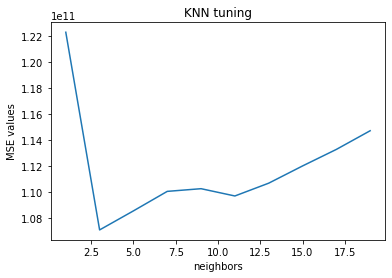

In [171]:
plt.plot(neighbors, mseValues)
plt.xlabel('neighbors')
plt.ylabel('MSE values')
plt.title('KNN tuning')
plt.show()

# Random Forest Regression
### Tried values from 1 - 100, intervals of 20 

Optimal n_estimators was found at n_estimators=81 with a mean squared error of 59960248636.54 and a root mean squared error of 244867.82

In [180]:
# Random Forest Regression 

nEstimators = []
mseValues = []
list = []

for i in range(1, 100, 20):
    rf = RandomForestRegressor(n_estimators=i, random_state=7)
    rf.fit(X_train, y_train)

    y_pred   = rf.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    score = rf.score(X_test, y_test)
    list.append(score)
    nEstimators.append(i)
    mseValues.append(mse)

    # Evaluate the Predictions
    print("The mean squared error is {}".format(round(mse, 2)))
    print(i)

print(list)


The mean squared error is 121206585946.63
1
The mean squared error is 64124500347.79
21
The mean squared error is 60946082631.66
41
The mean squared error is 60624998234.18
61
The mean squared error is 59960248636.54
81
[0.4057601528796839, 0.6856166438008815, 0.7011994806819783, 0.7027736620004315, 0.706032731597939]


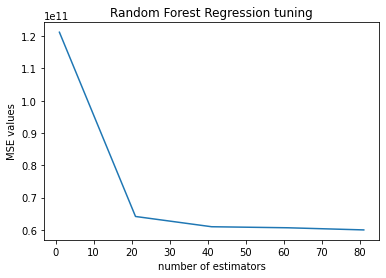

In [173]:
plt.plot(nEstimators, mseValues)
plt.xlabel('number of estimators')
plt.ylabel('MSE values')
plt.title('Random Forest Regression tuning')
plt.show()

# Linear Regression
### Generated the optimal linear regression to model features and price 

The mean squared error was found to be 177850322107.49 with a root mean squared error of 421723.04

In [174]:
# Linear Regression
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("The mean squared error is {}".format(round(mse, 2)))

The mean squared error is 177850322107.49


# Prediction using Real Data

Used line 67076 of the original dataset.  Has a price of $850,000.0

In [175]:
new_df = X_test.head(1).to_numpy()
X_test.head(1)

ob = df[df['address/zipcode'] == 10472.0]
ob = ob[ob['yearBuilt'] == 1926.0]
ob = ob[ob['livingArea'] == 3360.0]
ob.head(20)

,price,address/zipcode,bedrooms,bathrooms,address/city,yearBuilt,livingArea,resoFactsStats/hasHeating,schools/0/rating
67076,850000.0,10472.0,2.0,1.0,Bronx,1926.0,3360.0,False,3.0


In [176]:
# Prediction using the best predictor: Random Forest Regressor

result = rf.predict(new_df)
mse = mean_squared_error(y_test, y_pred)

    # Evaluate the Predictions
print("The mean squared error is {}".format(round(mse, 2)))
print(result)

The mean squared error is 177850322107.49
[669716.04938272]


C:\Users\anara\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Results from Prediction
The actual price was 850,000 and the predicted price was 669,716.05. This means that the model had an error of roughly 
200,000. This was slightly higher than the error we identified as ideal: 150,000. 

# Most Important Features

<BarContainer object of 8 artists>

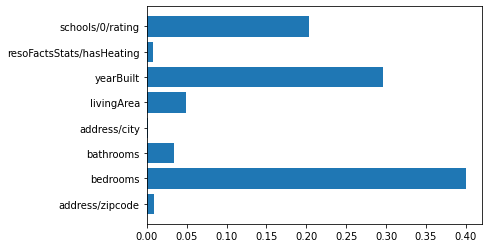

In [177]:
# The most important features (i.e. the features most closely correlated with price) are displayed below 

rf.feature_importances_
plt.barh(features, rf.feature_importances_)


# School rating, year built, bedrooms, and living area seem to be highly correlated. 